In [87]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [88]:
forex = pd.read_csv("completehour.csv",index_col="Time")

In [89]:
forex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 2019-01-01 23:00 to 2019-10-11 15:00
Data columns (total 6 columns):
EMA      4836 non-null float64
SMA      4836 non-null float64
RSI      4836 non-null float64
HBB      4836 non-null float64
LBB      4836 non-null float64
Value    4836 non-null float64
dtypes: float64(6)
memory usage: 264.5+ KB


In [90]:
forex.index = forex.index.to_datetime()

/Users/admin/miniconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


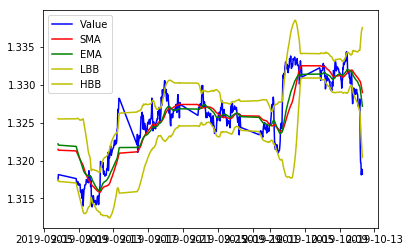

In [93]:
qnt = 600

plt.plot(forex.index[-qnt:],forex.Value[-qnt:],'b',label='Value')

plt.plot(forex.index[-qnt:],forex.SMA[-qnt:],'r',label='SMA')
plt.plot(forex.index[-qnt:],forex.EMA[-qnt:],'g',label='EMA')

plt.plot(forex.index[-qnt:],forex.LBB[-qnt:],'y',label='LBB')
plt.plot(forex.index[-qnt:],forex.HBB[-qnt:],'y',label='HBB')

plt.legend()

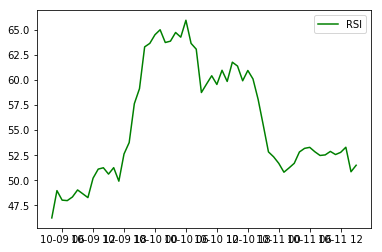

In [53]:
plt.plot(forex.index[-qnt:],forex.RSI[-qnt:],'g',label='RSI')

plt.legend()

In [54]:
forex.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Max,4841.0,1.329218,0.011893,1.302210,1.321540,1.329590,1.337230,1.365110
Min,4841.0,1.329012,0.011883,1.302130,1.321330,1.329370,1.337060,1.365040
SMA,4841.0,1.329297,0.011826,1.303625,1.321831,1.329304,1.337068,1.365050
SMAP,4841.0,1.329364,0.011912,1.303653,1.321838,1.329334,1.337228,1.363697
RSI,4841.0,49.157732,7.185684,0.000000,44.638836,49.109842,54.010176,91.366906
Value,4841.0,1.329115,0.011886,1.302200,1.321440,1.329480,1.337140,1.365050


In [55]:
# forex = forex.reset_index(drop=True)

In [56]:
x_data = forex.drop(['Value'],axis=1)

In [57]:
y_val = forex['Value']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.001,random_state=101)

In [59]:
test = pd.read_csv("dataforprediction.csv",index_col="Time")
test.index = pd.to_datetime(test.index)
X_test = test.drop(['Value'], axis=1)
y_test = test['Value']

In [60]:
X_train.index = [i.timestamp() for i in X_train.index]
X_test.index = [i.timestamp() for i in X_test.index]
y_train.index = [i.timestamp() for i in y_train.index]
y_test.index = [i.timestamp() for i in y_test.index]

In [61]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [62]:
# X_train = X_train.reset_index(drop=False)
# X_test = X_test.reset_index(drop=False)
# y_train = y_train.reset_index(drop=False)
# y_test = y_test.reset_index(drop=False)

In [63]:
scaler = MinMaxScaler()

In [64]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [65]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [66]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [67]:
forex.columns

Index(['Max', 'Min', 'SMA', 'SMAP', 'RSI', 'Value'], dtype='object')

In [68]:
max_value = tf.feature_column.numeric_column('Max')
min_value = tf.feature_column.numeric_column('Min')
sma = tf.feature_column.numeric_column('SMA')
smap = tf.feature_column.numeric_column('SMAP')
rsi = tf.feature_column.numeric_column('RSI')

In [69]:
feat_cols = [max_value, min_value, sma, rsi]

In [70]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,
                                            shuffle=True)

In [71]:
model = tf.estimator.DNNRegressor(hidden_units=[6,10,10,6],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_model_dir': '/var/folders/pr/t9901z0n4z7dbkstysncwp0m0000gn/T/tmp6ltsgyi1', '_session_config': None, '_save_checkpoints_secs': 600}


In [72]:
model.train(input_fn=input_func,steps=25000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/pr/t9901z0n4z7dbkstysncwp0m0000gn/T/tmp6ltsgyi1/model.ckpt.
INFO:tensorflow:loss = 17.254477, step = 1
INFO:tensorflow:global_step/sec: 618.173
INFO:tensorflow:loss = 0.014510717, step = 101 (0.166 sec)
INFO:tensorflow:global_step/sec: 562.55
INFO:tensorflow:loss = 0.016331924, step = 201 (0.175 sec)
INFO:tensorflow:global_step/sec: 585.247
INFO:tensorflow:loss = 0.0148799475, step = 301 (0.171 sec)
INFO:tensorflow:global_step/sec: 645.336
INFO:tensorflow:loss = 0.00884002, step = 401 (0.156 sec)
INFO:tensorflow:global_step/sec: 618.403
INFO:tensorflow:loss = 0.021866519, step = 501 (0.162 sec)
INFO:tensorflow:global_step/sec: 571.142
INFO:tensorflow:loss = 0.0044516143, step = 601 (0.174 sec)
INFO:tensorflow:global_step/sec: 597.817
INFO:tensorflow:loss = 0.0037761102, step = 701 (0.168 sec)
INFO:tensorflow:global_step/sec: 625.11
INFO:tensorflow:loss = 0.002105795, step = 801 (0.160

INFO:tensorflow:loss = 4.791834e-07, step = 7901 (0.177 sec)
INFO:tensorflow:global_step/sec: 584.235
INFO:tensorflow:loss = 2.7482276e-06, step = 8001 (0.172 sec)
INFO:tensorflow:global_step/sec: 558.897
INFO:tensorflow:loss = 3.911e-06, step = 8101 (0.179 sec)
INFO:tensorflow:global_step/sec: 593.76
INFO:tensorflow:loss = 5.4434176e-06, step = 8201 (0.167 sec)
INFO:tensorflow:global_step/sec: 585.189
INFO:tensorflow:loss = 4.0100232e-07, step = 8301 (0.171 sec)
INFO:tensorflow:global_step/sec: 557.982
INFO:tensorflow:loss = 1.8815342e-07, step = 8401 (0.179 sec)
INFO:tensorflow:global_step/sec: 632.811
INFO:tensorflow:loss = 3.0536203e-06, step = 8501 (0.160 sec)
INFO:tensorflow:global_step/sec: 631.924
INFO:tensorflow:loss = 1.8683022e-06, step = 8601 (0.158 sec)
INFO:tensorflow:global_step/sec: 565.071
INFO:tensorflow:loss = 1.1802606e-06, step = 8701 (0.176 sec)
INFO:tensorflow:global_step/sec: 572.801
INFO:tensorflow:loss = 1.1097941e-06, step = 8801 (0.176 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 597.56
INFO:tensorflow:loss = 1.7527055e-06, step = 15901 (0.169 sec)
INFO:tensorflow:global_step/sec: 545.244
INFO:tensorflow:loss = 2.0744617e-06, step = 16001 (0.182 sec)
INFO:tensorflow:global_step/sec: 623.632
INFO:tensorflow:loss = 9.954683e-07, step = 16101 (0.163 sec)
INFO:tensorflow:global_step/sec: 625.056
INFO:tensorflow:loss = 7.9469464e-07, step = 16201 (0.159 sec)
INFO:tensorflow:global_step/sec: 640.233
INFO:tensorflow:loss = 2.102988e-05, step = 16301 (0.156 sec)
INFO:tensorflow:global_step/sec: 540.429
INFO:tensorflow:loss = 9.155525e-07, step = 16401 (0.185 sec)
INFO:tensorflow:global_step/sec: 524.805
INFO:tensorflow:loss = 3.003433e-07, step = 16501 (0.190 sec)
INFO:tensorflow:global_step/sec: 558.014
INFO:tensorflow:loss = 1.09548765e-07, step = 16601 (0.183 sec)
INFO:tensorflow:global_step/sec: 629.941
INFO:tensorflow:loss = 2.2093743e-06, step = 16701 (0.156 sec)
INFO:tensorflow:global_step/sec: 568.589
INFO:tensorflow:loss = 3.50

INFO:tensorflow:loss = 1.6129482e-06, step = 23801 (0.169 sec)
INFO:tensorflow:global_step/sec: 590.026
INFO:tensorflow:loss = 1.5769373e-07, step = 23901 (0.170 sec)
INFO:tensorflow:global_step/sec: 607.608
INFO:tensorflow:loss = 1.04453136e-07, step = 24001 (0.166 sec)
INFO:tensorflow:global_step/sec: 528.907
INFO:tensorflow:loss = 4.4616054e-06, step = 24101 (0.188 sec)
INFO:tensorflow:global_step/sec: 562.781
INFO:tensorflow:loss = 1.6736083e-06, step = 24201 (0.178 sec)
INFO:tensorflow:global_step/sec: 555.525
INFO:tensorflow:loss = 1.2804172e-07, step = 24301 (0.179 sec)
INFO:tensorflow:global_step/sec: 566.081
INFO:tensorflow:loss = 7.996316e-07, step = 24401 (0.177 sec)
INFO:tensorflow:global_step/sec: 576.426
INFO:tensorflow:loss = 4.1902763e-07, step = 24501 (0.173 sec)
INFO:tensorflow:global_step/sec: 575.099
INFO:tensorflow:loss = 2.0397424e-06, step = 24601 (0.174 sec)
INFO:tensorflow:global_step/sec: 555.111
INFO:tensorflow:loss = 6.681428e-07, step = 24701 (0.180 sec)
IN

In [73]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [74]:
pred_gen = model.predict(predict_input_func)

In [75]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from /var/folders/pr/t9901z0n4z7dbkstysncwp0m0000gn/T/tmp6ltsgyi1/model.ckpt-25000


In [76]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [77]:
mean_squared_error(y_test,final_preds)**0.5

0.0003163756942750062

In [78]:
X_train.index = [datetime.datetime.fromtimestamp(i) for i in X_train.index]
X_test.index = [datetime.datetime.fromtimestamp(i) for i in X_test.index]
y_train.index = [datetime.datetime.fromtimestamp(i) for i in y_train.index]
y_test.index = [datetime.datetime.fromtimestamp(i) for i in y_test.index]

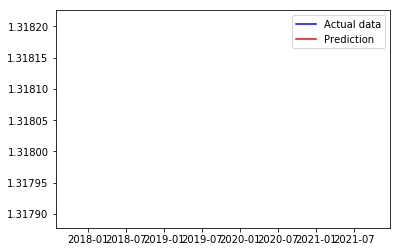

In [79]:
qnt = 500
plt.plot(y_test.index[-qnt:],y_test[-qnt:],'b',label="Actual data")
plt.plot(X_test.index[-qnt:],final_preds[-qnt:],'r',label="Prediction")
# plt.plot(X_test)

plt.legend();

In [80]:
y_test.tail(2)

2019-10-11 11:00:00    1.31821
Name: Value, dtype: float64

In [81]:
final_preds[-2:]

[array([1.3178936], dtype=float32)]